<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/keras_OCR_Boxed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras OCR
A packaged and flexible version of the CRAFT text detector and Keras CRNN recognition model

based on the project https://github.com/faustomorales/keras-ocr

> Colab by [mrm8488](https://twitter.com/mrm8488)



In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
!pip install keras-ocr

In [3]:
import matplotlib.pyplot as plt
import keras_ocr
import os
import cv2
import numpy as np


In [4]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [5]:
!mkdir uploads

mkdir: cannot create directory ‘uploads’: File exists


## Upload files (images with text) form your local filesystem

In [7]:
# IMPORTANT! If the execution of this cell fails, JUST EXECUTE IT AGAIN!
from google.colab import files

uploaded = files.upload()
uploaded_files = list(uploaded.keys())
for uploaded_file in uploaded_files:
  print(uploaded_file)
  !mv $uploaded_file uploads/$uploaded_file

Saving physic.jpg to physic.jpg
Saving work.jpg to work.jpg
physic.jpg
work.jpg


In [8]:
uploads_dir = "/content/uploads"
custom_images = []

for filename in os.listdir(uploads_dir):
    print(os.path.join(uploads_dir, filename))
    custom_images.append(os.path.join(uploads_dir, filename))

images = [ keras_ocr.tools.read(path) for path in custom_images]

/content/uploads/work.jpg
/content/uploads/physic.jpg


In [9]:
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
%time predictions = pipeline.recognize(images)

CPU times: user 45.4 s, sys: 2.48 s, total: 47.9 s
Wall time: 51.8 s


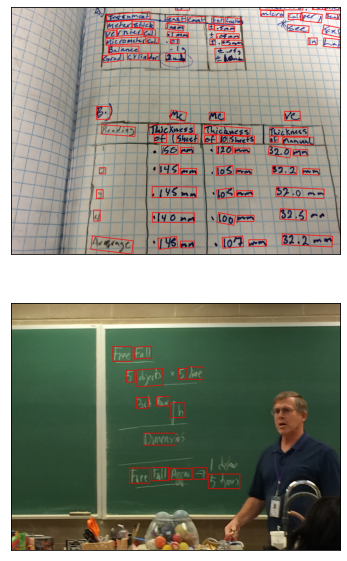

In [10]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 10))
if(len(custom_images) == 1):
  for image, prediction in zip(images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=axs)
else:
  for ax, image, prediction in zip(axs, images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=ax)

In [11]:
with open('results.txt', 'a+') as f:
  for idx, prediction in enumerate(predictions):
    if(idx != 0):
      print("\n")
      f.write("\n\n")
    print("Results for the file: " + os.path.basename(custom_images[idx]))
    f.write("Results for the file: " + os.path.basename(custom_images[idx]) + ":\n\n")
    for word, array in prediction:
      if word == "\n":
        print("\n")
        f.write("\n")
      else:
        print(word,  end = ' ')
        f.write(word + " ")

Results for the file: work.jpg
p rrs ver mis micro tcsrsument ses cali pio l east counb fst lactis meter stick laan t se asrr fae rnied cal vc lmm oscnn miccomclec col in lal 01 t osn bajance sloss cylin drd rnas god bu me vc mc uickncss feading hichness lickness of shet of sheets lo oc marmal 1st 320 120 mm mm ru jys los s92 d rm mro rars lysmm szlolmn los 5 mua 5218 y styonm l00 an 31lmn avgrase lon lys wsn mm 

Results for the file: physic.jpg
tree fall nck 5 sld 5 ta 2 th dons tail a hut aern 5or 

In [12]:
files.download("results.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>